##### 서울 열린 데이터 광장
-   서울시 자치구 년도별 CCTV 설치 현황(https://data.seoul.go.kr/dataList/OA-2734/F/1/datasetView.do)
-   서울시 5대 범죄 발생 현황(https://data.seoul.go.kr/dataList/316/S/2/datasetView.do)
-   서울시 주민등록인구(월별_구별) 통계(https://data.seoul.go.kr/dataList/11067/S/2/datasetView.do)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# warnings : 함수를 현재는 지원하나 나중에 삭제 시 경고 메세지가 발생
import warnings
warnings.simplefilter("ignore")

sns.set_theme()
sns.set(rc={"figure.figsize":(10,5)})

plt.rcParams["font.family"]="Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

##### 1. CCTV 설치 현황

In [122]:
# cctv 데이터 로드

cctv_df = pd.read_csv("./data/CCTV 설치 현황_221231기준.csv",encoding="ms949",thousands=",",skiprows=[1],)
cctv_df.head()

,구분,총계,2013년 이전\n설치된 CCTV,2013년,2014년,2015년,2016년,2017년,2018년,2019년,...,Unnamed: 16374,Unnamed: 16375,Unnamed: 16376,Unnamed: 16377,Unnamed: 16378,Unnamed: 16379,Unnamed: 16380,Unnamed: 16381,Unnamed: 16382,Unnamed: 16383
0,종로구,1980,36,540,107,161,131,158,152,69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,중 구,2584,130,87,77,236,240,372,386,155,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,용산구,2847,44,50,68,83,295,491,115,322,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,성동구,4047,58,99,110,366,279,945,459,647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,광진구,3480,507,82,84,64,21,465,443,709,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
cctv_df.columns

Index(['구분', '총계', '2013년 이전\n설치된 CCTV', '2013년', '2014년', '2015년', '2016년',
       '2017년', '2018년', '2019년',
       ...
       'Unnamed: 16374', 'Unnamed: 16375', 'Unnamed: 16376', 'Unnamed: 16377',
       'Unnamed: 16378', 'Unnamed: 16379', 'Unnamed: 16380', 'Unnamed: 16381',
       'Unnamed: 16382', 'Unnamed: 16383'],
      dtype='object', length=16384)

In [123]:
# 데이터 전처리
# 필요한 컬럼만 복사해서 데이터프레임 생성
cctv_df = cctv_df[['구분', '총계', '2013년 이전\n설치된 CCTV', '2013년', '2014년', '2015년', '2016년', '2017년', '2018년', '2019년','2020년','2021년','2022년']]
cctv_df

,구분,총계,2013년 이전\n설치된 CCTV,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년
0,종로구,1980,36,540,107,161,131,158,152,69,250,85,291
1,중 구,2584,130,87,77,236,240,372,386,155,361,403,137
2,용산구,2847,44,50,68,83,295,491,115,322,623,422,334
3,성동구,4047,58,99,110,366,279,945,459,647,485,367,232
4,광진구,3480,507,82,84,64,21,465,443,709,172,662,271
5,동대문구,2759,1,4,12,107,802,711,201,218,223,221,259
6,중랑구,4193,224,331,104,145,153,170,215,1074,976,507,294
7,성북구,4842,137,170,229,322,594,811,867,714,253,407,338
8,강북구,3321,0,21,16,68,210,4,375,963,569,298,797
9,도봉구,2247,103,2,79,72,103,117,200,202,183,600,586


In [124]:
# 컬럼명 변경
# 구분 => 구 별, 총계 => cctv 총계, 2013년 이전\n설치된 CCTV => 2013년 이전
cctv_df.rename(columns={"구분":"구 별","총계":"cctv 총계","2013년 이전\n설치된 CCTV":"2013년 이전"},inplace=True)

In [48]:
#2020년 이전 컬럼 생성 = 213
cctv_df["2020년 이전"] = cctv_df["2013년 이전"] + cctv_df["2013년"] +cctv_df["2014년"] +cctv_df["2015년"] +cctv_df["2016년"]+cctv_df["2017년"]+cctv_df["2018년"]+cctv_df["2019년"]

In [50]:
cctv_df.drop(columns=['2020년 이전'],inplace=True)

In [125]:
# 2020년 이전 컬럼 생성 = 2013년 이전 + ~~~ + 2020년 
# 방법 2 :difference()

#cctv_df.columns.difference(['구 별','cctv 총계','2021년','2022년'])

cctv_df["2020년 이전"] = cctv_df[cctv_df.columns.difference(['구 별','cctv 총계','2021년','2022년'])].sum(axis=1)

In [121]:

cctv_df[cctv_df.columns.difference(['구 별','cctv 총계','2021년','2022년'])].sum(axis=1)

0      4812
1      6132
2      6273
3     10344
4      7641
5      6837
6     10176
7     12291
8      6678
9      3183
10     6735
11    10980
12     8274
13     7002
14     9498
15     6813
16    11298
17     6456
18    11595
19     6858
20    14052
21    10659
22    18783
23     8133
24     7380
dtype: int64

In [120]:
cctv_df.head(1)

,구 별,cctv 총계,2013년 이전,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2020년 이전
0,종로구,1980,36,540,107,161,131,158,152,69,250,85,291,3208


In [118]:
cctv_df.columns

Index(['구 별', 'cctv 총계', '2013년 이전', '2013년', '2014년', '2015년', '2016년',
       '2017년', '2018년', '2019년', '2020년', '2021년', '2022년', '2020년 이전'],
      dtype='object')

In [126]:
cctv_df.drop(columns=['2013년 이전', '2013년', '2014년', '2015년', '2016년', '2017년', '2018년', '2019년', '2020년'],inplace=True)

In [127]:
cctv_df

,구 별,cctv 총계,2021년,2022년,2020년 이전
0,종로구,1980,85,291,1604
1,중 구,2584,403,137,2044
2,용산구,2847,422,334,2091
3,성동구,4047,367,232,3448
4,광진구,3480,662,271,2547
5,동대문구,2759,221,259,2279
6,중랑구,4193,507,294,3392
7,성북구,4842,407,338,4097
8,강북구,3321,298,797,2226
9,도봉구,2247,600,586,1061


In [128]:
# 중 구=> 중구
cctv_df.iloc[1,0]="중구"

In [57]:
# 데이터 분석
# 1. 구별 cctv가 가장 적게 설치되어 있는 구 알아보기
cctv_df[min(cctv_df['cctv 총계'])==cctv_df['cctv 총계']]
# 2. 구별 cctv가 가장 많이 설치되어 있는 구 알아보기

,구 별,cctv 총계,2021년,2022년,2020년 이전
0,종로구,1980,85,291,1604


In [58]:
cctv_df[max(cctv_df['cctv 총계'])==cctv_df['cctv 총계']]

,구 별,cctv 총계,2021년,2022년,2020년 이전
22,강남구,7243,514,468,6261


2.서울시 거주 인구

In [62]:
seoul_df =pd.read_excel("./data/주민등록인구(월별)_202212.xlsx",thousands=",",skiprows=[0,1,3],usecols='B,D,G,J')

In [64]:
seoul_df.columns

Index(['동별(2)', '소계.1', '소계.2', '소계.3'], dtype='object')

In [67]:
seoul_df= seoul_df.rename(columns={"동별(2)":"구 별","소계.1":"총인구","소계.2":"한국인","소계.3":"외국인"})

In [129]:
merge_df=pd.merge(seoul_df,cctv_df,on="구 별")

In [130]:
merge_df.set_index('구 별',inplace=True)

In [131]:
merge_df

,총인구,한국인,외국인,cctv 총계,2021년,2022년,2020년 이전
구 별,,,,,,,
종로구,152211,141379,10832,1980,85,291,1604
중구,130785,120437,10348,2584,403,137,2044
용산구,233284,218650,14634,2847,422,334,2091
성동구,288234,281000,7234,4047,367,232,3448
광진구,351252,337416,13836,3480,662,271,2547
동대문구,353601,336644,16957,2759,221,259,2279
중랑구,390140,385318,4822,4193,507,294,3392
성북구,441984,430397,11587,4842,407,338,4097
강북구,297702,293660,4042,3321,298,797,2226


In [132]:
# 1인당 cctv 비율 구하기
merge_df['1인당 cctv 비율']=merge_df['cctv 총계'] / merge_df['총인구']*100

In [76]:
merge_df

,총인구,한국인,외국인,cctv 총계,2021년,2022년,2020년 이전,1인당 cctv 비율
구 별,,,,,,,,
종로구,152211,141379,10832,1980,85,291,1604,1.300826
용산구,233284,218650,14634,2847,422,334,2091,1.220401
성동구,288234,281000,7234,4047,367,232,3448,1.404068
광진구,351252,337416,13836,3480,662,271,2547,0.990742
동대문구,353601,336644,16957,2759,221,259,2279,0.780258
중랑구,390140,385318,4822,4193,507,294,3392,1.074742
성북구,441984,430397,11587,4842,407,338,4097,1.095515
강북구,297702,293660,4042,3321,298,797,2226,1.115545
도봉구,313989,311694,2295,2247,600,586,1061,0.715630


In [ ]:
# 상관계수
# 변수간의 관계의 정도와 방향을 수치로 요약해 주는 지표
# 수치는 -1~ +1 사이의 값으로 나타남
# 0에 가까울수록 상관 관계는 낮아지며, -1이나 +1에 가까울수록 상관관계는 높아짐
# 증감의 방향이 + 인 경우에는 정적인 상관관계, -인 경우에는 부정적인 상관관계가 있다고 봄

In [133]:
merge_df['총인구'].corr(merge_df['cctv 총계'],method='spearman')

0.4815384615384616

In [134]:
merge_df['외국인'].corr(merge_df['cctv 총계'],method='spearman')

0.07461538461538461

## 시각화

Text(0.5, 1.0, '구별 1인당 cctv 비율')

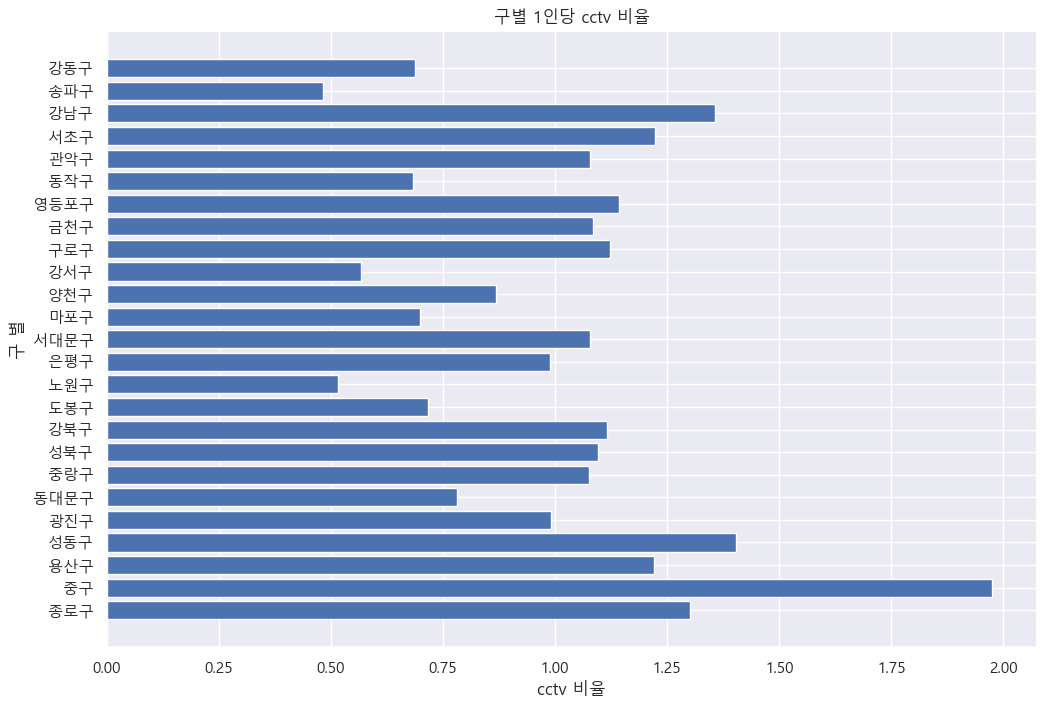

In [135]:
plt.figure(figsize=(12,8))

plt.barh(merge_df.index,merge_df['1인당 cctv 비율'])
plt.xlabel("cctv 비율")
plt.ylabel("구 별")

plt.title("구별 1인당 cctv 비율")

Text(0.5, 1.0, '구 별 1인당 cctv 비율')

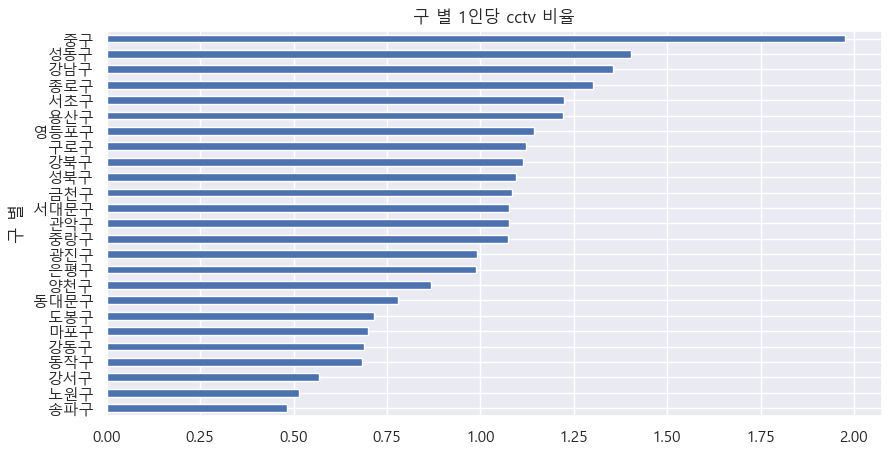

In [136]:
merge_df['1인당 cctv 비율'].sort_values().plot.barh()
plt.title("구 별 1인당 cctv 비율")

<Axes: xlabel='1인당 cctv 비율', ylabel='구 별'>

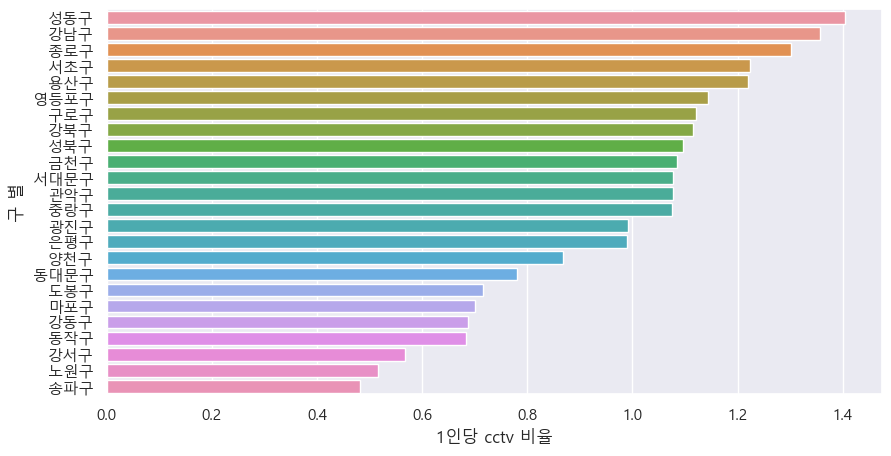

In [90]:
sns.barplot(data=merge_df,x='1인당 cctv 비율',y=merge_df.index,order=merge_df['1인당 cctv 비율'].sort_values(ascending=False).index)

#### 3.5대 범죄

In [150]:
crime_df=pd.read_excel("./data/5대범죄_2021.xlsx",usecols='B,C,D',skiprows=[0,1,2,4])

In [151]:
crime_df

,자치구별(2),발생,검거
0,종로구,2712,2755
1,중구,2861,2072
2,용산구,2381,1659
3,성동구,2112,1510
4,광진구,3087,2202
5,동대문구,2959,2113
6,중랑구,3210,2405
7,성북구,2411,1787
8,강북구,2301,1912
9,도봉구,1860,1294


In [155]:
# 컬럼명 변경
# 구 별, 범죄건, 검거건
crime_df.columns=['구 별','범죄건','검거건']
# 인덱스 설정 : 구 별
crime_df.set_index('구 별',inplace=True)
# 검거율 = 검거건/ 범죄건 * 100
crime_df['검거율'] = crime_df['검거건'] / crime_df['범죄건'] *100

In [156]:
crime_df.head(2)

,범죄건,검거건,검거율
구 별,,,
종로구,2712,2755,101.585546
중구,2861,2072,72.422230


In [157]:
# crime_df, merge_df 병합 : merge(), concat()

pd.concat([merge_df,crime_df],axis=1)

,총인구,한국인,외국인,cctv 총계,2021년,2022년,2020년 이전,1인당 cctv 비율,범죄건,검거건,검거율
구 별,,,,,,,,,,,
종로구,152211,141379,10832,1980,85,291,1604,1.300826,2712,2755,101.585546
중구,130785,120437,10348,2584,403,137,2044,1.975762,2861,2072,72.422230
용산구,233284,218650,14634,2847,422,334,2091,1.220401,2381,1659,69.676606
성동구,288234,281000,7234,4047,367,232,3448,1.404068,2112,1510,71.496212
광진구,351252,337416,13836,3480,662,271,2547,0.990742,3087,2202,71.331390
동대문구,353601,336644,16957,2759,221,259,2279,0.780258,2959,2113,71.409260
중랑구,390140,385318,4822,4193,507,294,3392,1.074742,3210,2405,74.922118
성북구,441984,430397,11587,4842,407,338,4097,1.095515,2411,1787,74.118623
강북구,297702,293660,4042,3321,298,797,2226,1.115545,2301,1912,83.094307
